In [10]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    import missingno as msno
    import altair as alt
    import pymongo as mongo
except:
    print('Some libraries are not importing')

# TO STORE PLOTS
%matplotlib inline

# PRE-DEFINED STYLE
plt.style.use('ggplot')


# For handling default Matplotlib values 
# Documentation
mpl.rcParams['axes.unicode_minus'] = False

# Read data from csv
df = pd.read_csv('day.csv')

# Reading data from Mongo DB


# package which enables us to connect to the MongoDB
dbConn = mongo.MongoClient("mongodb://localhost:27017/")  # connecting to the locally running MongoDB Instance

# connecting to the database named demoDB present in the mongoDB
# if the database is not present, it'll autoamtically create it.
dbname='DEV'
db = dbConn[dbname] 

if dblist.index(db_name)==-1:
    print (db_name, " Databse doesn't exist")
else:
    print (db_name, " Databse exists")


# In[6]:


# connecting to a collection--- collections are analogous to tables
collection_name='day'
collection=db[collection_name]  # connectig to the collection itself present in the database.


# In[7]:


# cheking if a collection exists
if collection_name in db.list_collection_names():
    print(collection_name, " collection exists.")
else:
    print(collection_name, "collection doesn't exist.")
    
df = pd.DataFrame.from_records(collection.find({}))


FileNotFoundError: [Errno 2] File day.csv does not exist: 'day.csv'

In [8]:
#df.drop(df.columns[0], axis=1)

In [9]:
# Inspect Data Load
df.head()

Empty DataFrame
Columns: []
Index: []

In [3]:
# Check dataframe columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
# Check shape
df.shape

(731, 16)

# Data Description:

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

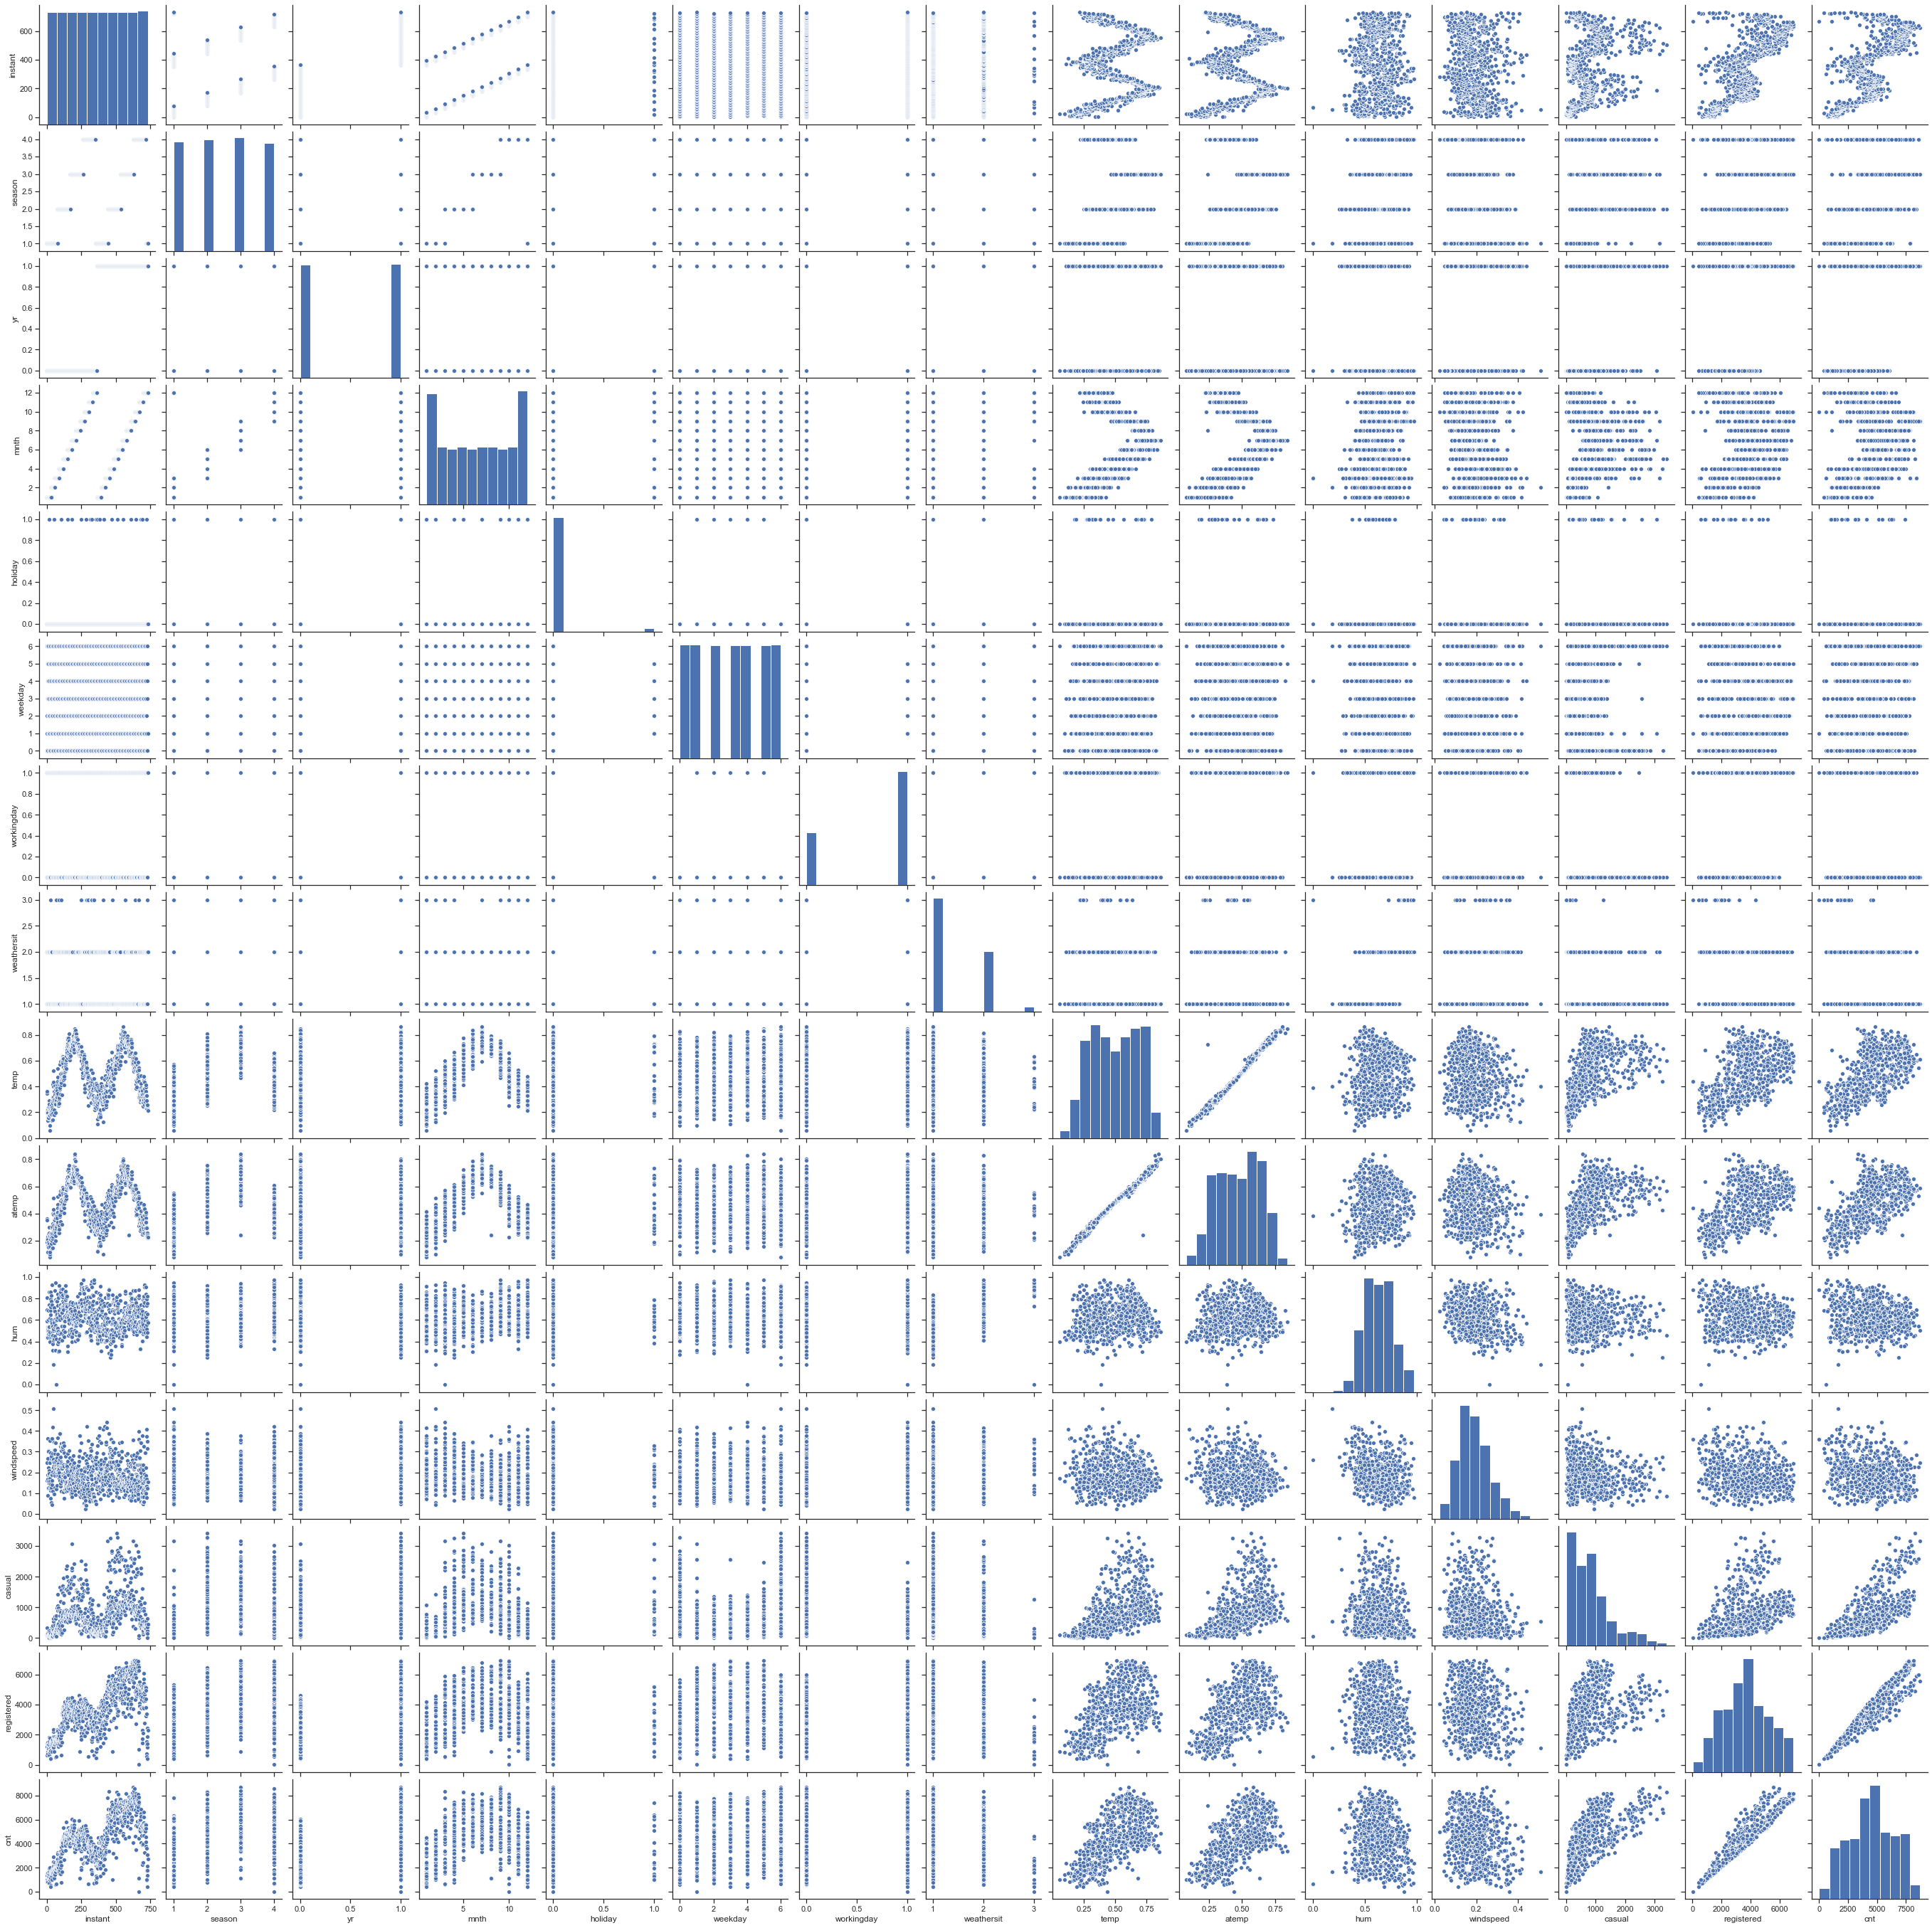

In [12]:
# Pair Plot 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

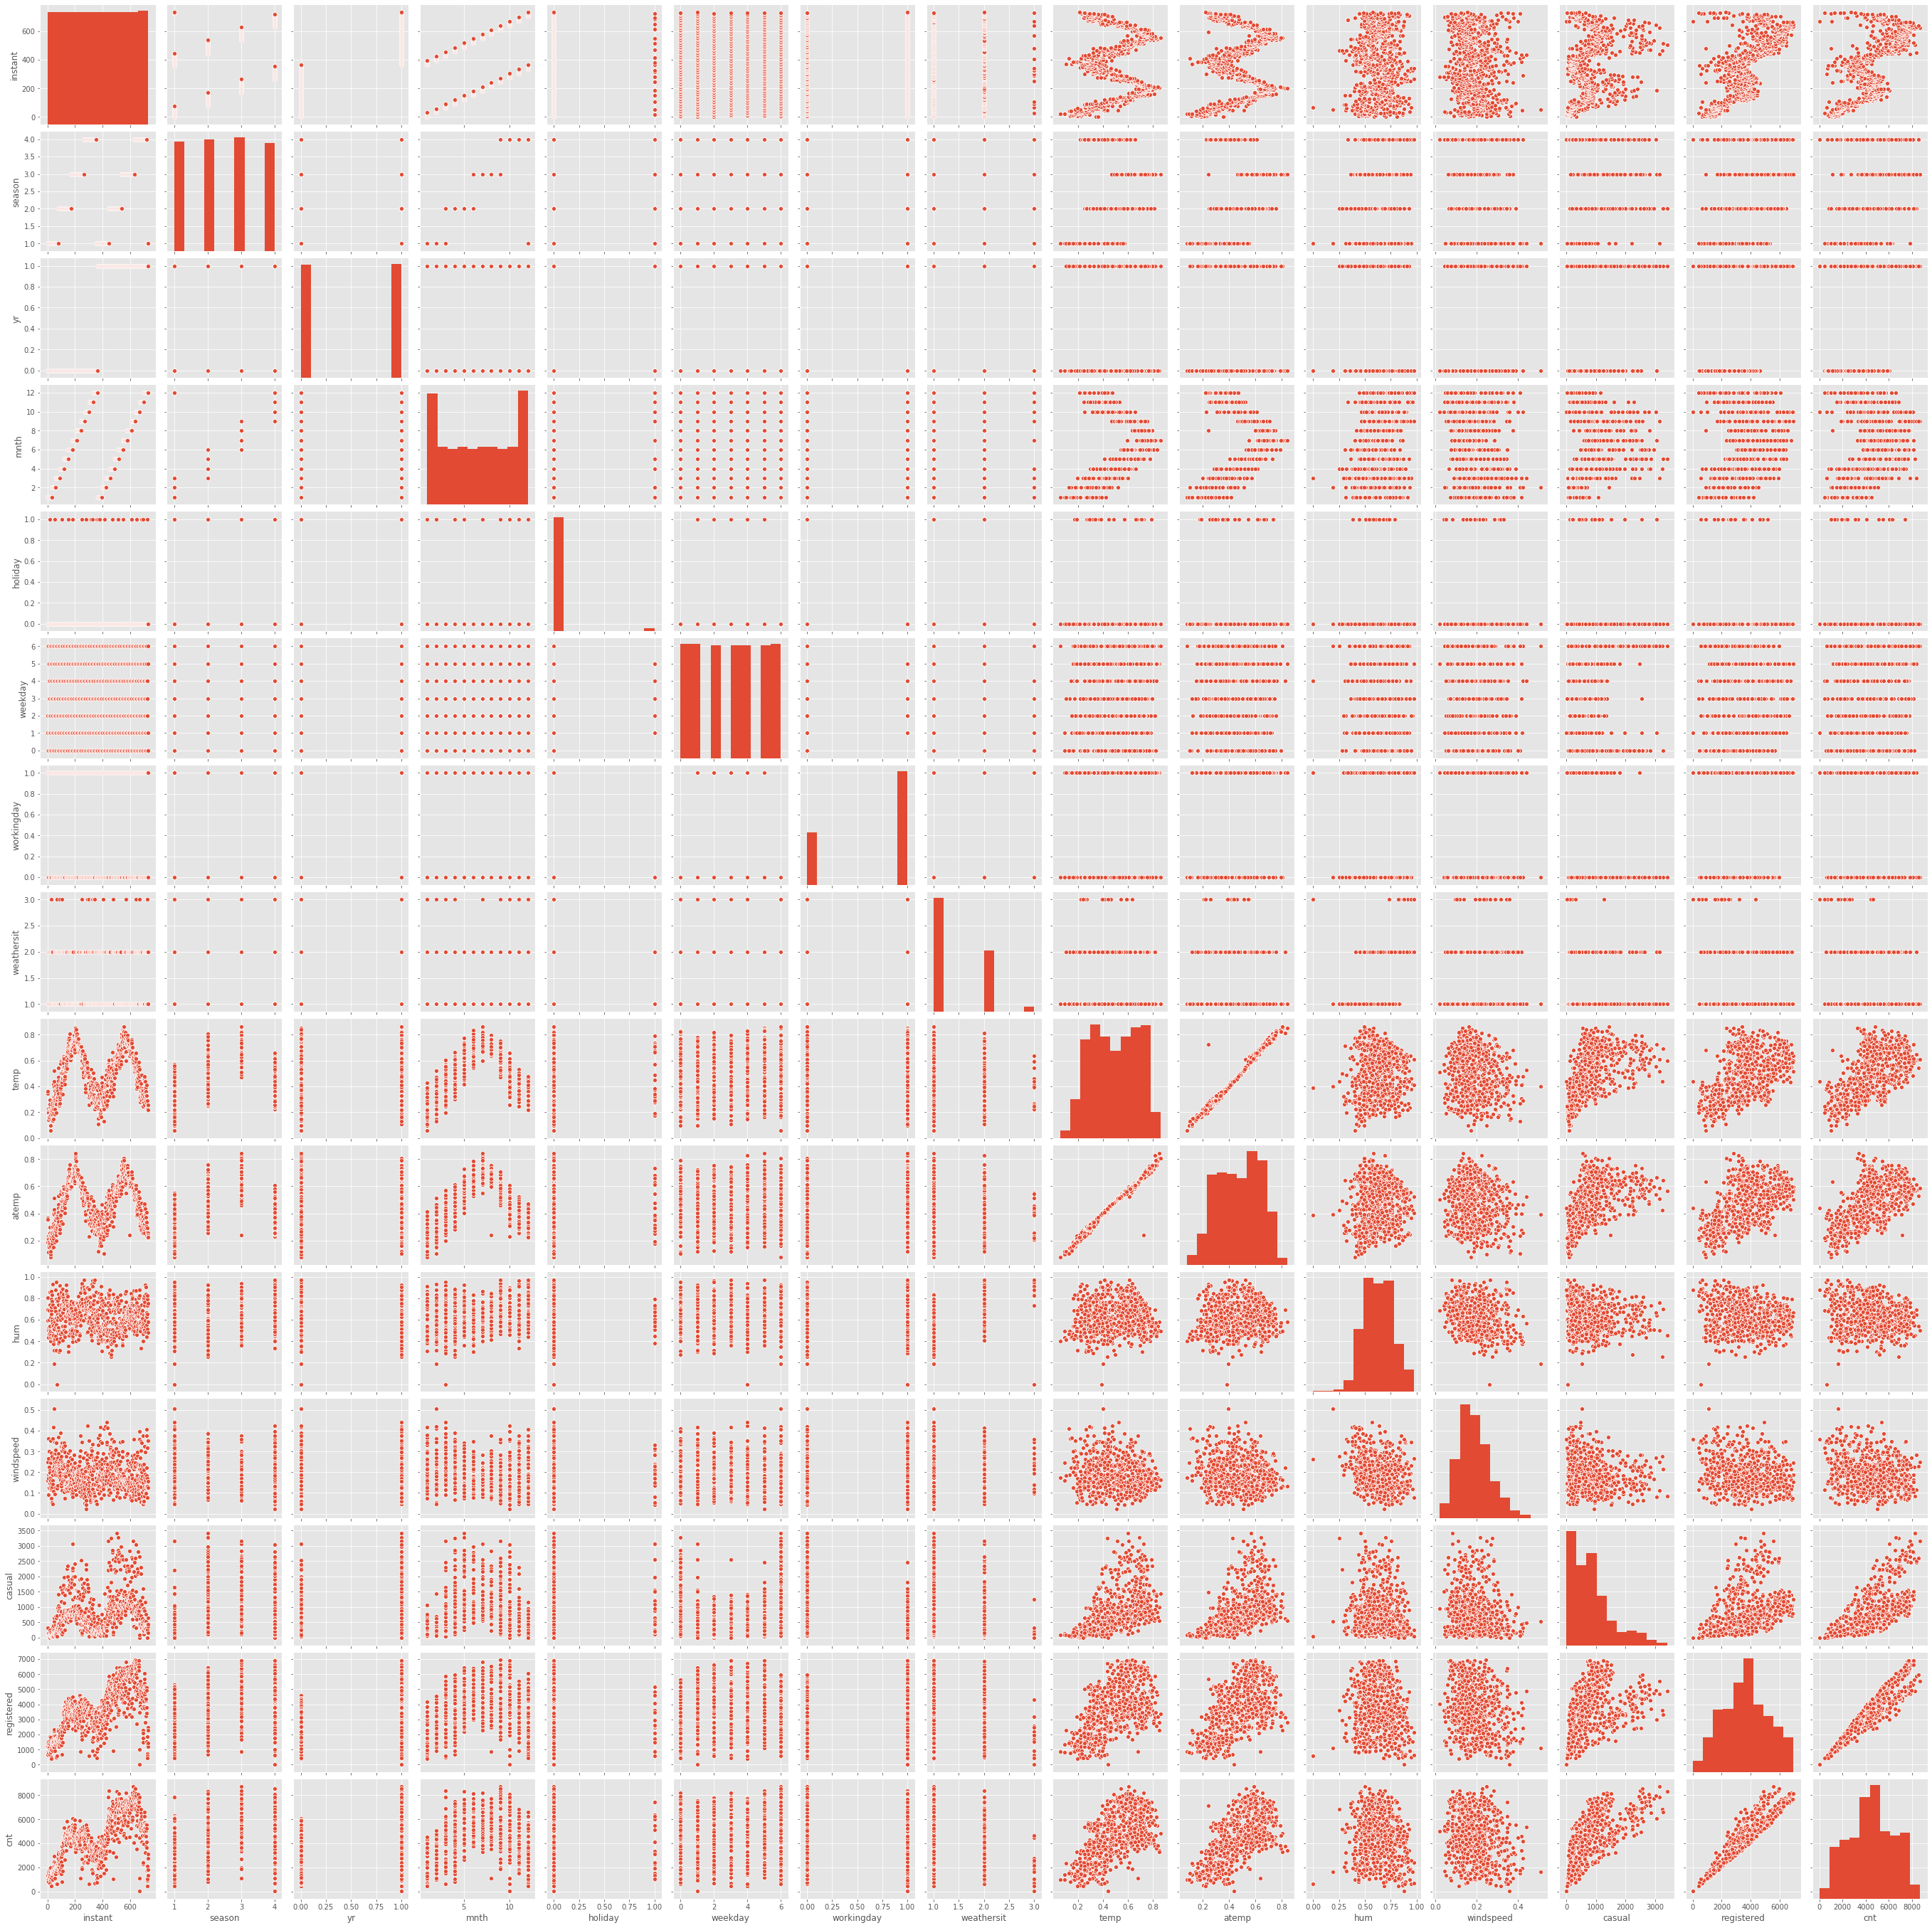

In [5]:
g = sns.pairplot(df, palette='husl')

In [6]:
df.corr()

instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.248546  0.123006  0.054274  0.059923   
registered  0.659623  0.411623  0.594248  0.293488 -0.108745  0.057367   
cnt         0.628830  0.406100  0.566710  0.279977 -0.068348  0.067443   

            workingday  weathersit      temp     atemp       hum  windspeed  \
instant      -0.004337   -0.021477  0.150580  0.152638  0.016375  -0.112620   
season        0.012485    0.019211  0.334315  0.342876  0.205445  -0.229046   
yr           -0.002013   -0.048727  0.047604  0.046106 -0.110651  -0.011817   
mnth         -0.005901    0.043528  0.220205  0.227459  0.222204  -0.207502   
holiday      -0.253023   -0.034627 -0.028556 -0.032507 -0.015937   0.006292   
weekday       0.035790    0.031087 -0.000170 -0.007537 -0.052232   0.014282   
workingday    1.000000    0.061200  0.052660  0.052182  0.024327  -0.018796   
weathersit    0.061200    1.000000 -0.120602 -0.121583  0.591045   0.039511   
temp          0.052660   -0.120602  1.000000  0.991702  0.126963  -0.157944   
atemp         0.052182   -0.121583  0.991702  1.000000  0.139988  -0.183643   
hum           0.024327    0.591045  0.126963  0.139988  1.000000  -0.248489   
windspeed    -0.018796    0.039511 -0.157944 -0.183643 -0.248489   1.000000   
casual       -0.518044   -0.247353  0.543285  0.543864 -0.077008  -0.167613   
registered    0.303907   -0.260388  0.540012  0.544192 -0.091089  -0.217449   
cnt           0.061156   -0.297391  0.627494  0.631066 -0.100659  -0.234545   

              casual  registered       cnt  
instant     0.275255    0.659623  0.628830  
season      0.210399    0.411623  0.406100  
yr          0.248546    0.594248  0.566710  
mnth        0.123006    0.293488  0.279977  
holiday     0.054274   -0.108745 -0.068348  
weekday     0.059923    0.057367  0.067443  
workingday -0.518044    0.303907  0.061156  
weathersit -0.247353   -0.260388 -0.297391  
temp        0.543285    0.540012  0.627494  
atemp       0.543864    0.544192  0.631066  
hum        -0.077008   -0.091089 -0.100659  
windspeed  -0.167613   -0.217449 -0.234545  
casual      1.000000    0.395282  0.672804  
registered  0.395282    1.000000  0.945517  
cnt         0.672804    0.945517  1.000000

In [7]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 133.6 KB


In [8]:
day.info(memory_usage='deep',verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Columns: 16 entries, instant to cnt
dtypes: float64(4), int64(11), object(1)
memory usage: 133.6 KB


In [9]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

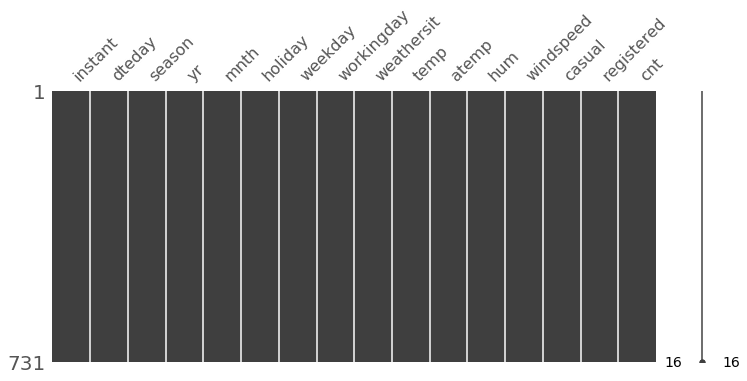

In [11]:
import missingno as msno

msno.matrix(df, figsize=(12,5))

In [12]:
df.dteday = pd.to_datetime(df.dteday)

In [13]:
# Craete calculated columns for year month and day
df["year"] = df["dteday"].dt.year
df["month"] = df["dteday"].dt.month
df["day"] = df["dteday"].dt.day

In [14]:
df.shape

(731, 19)

[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'Rental by Day')]

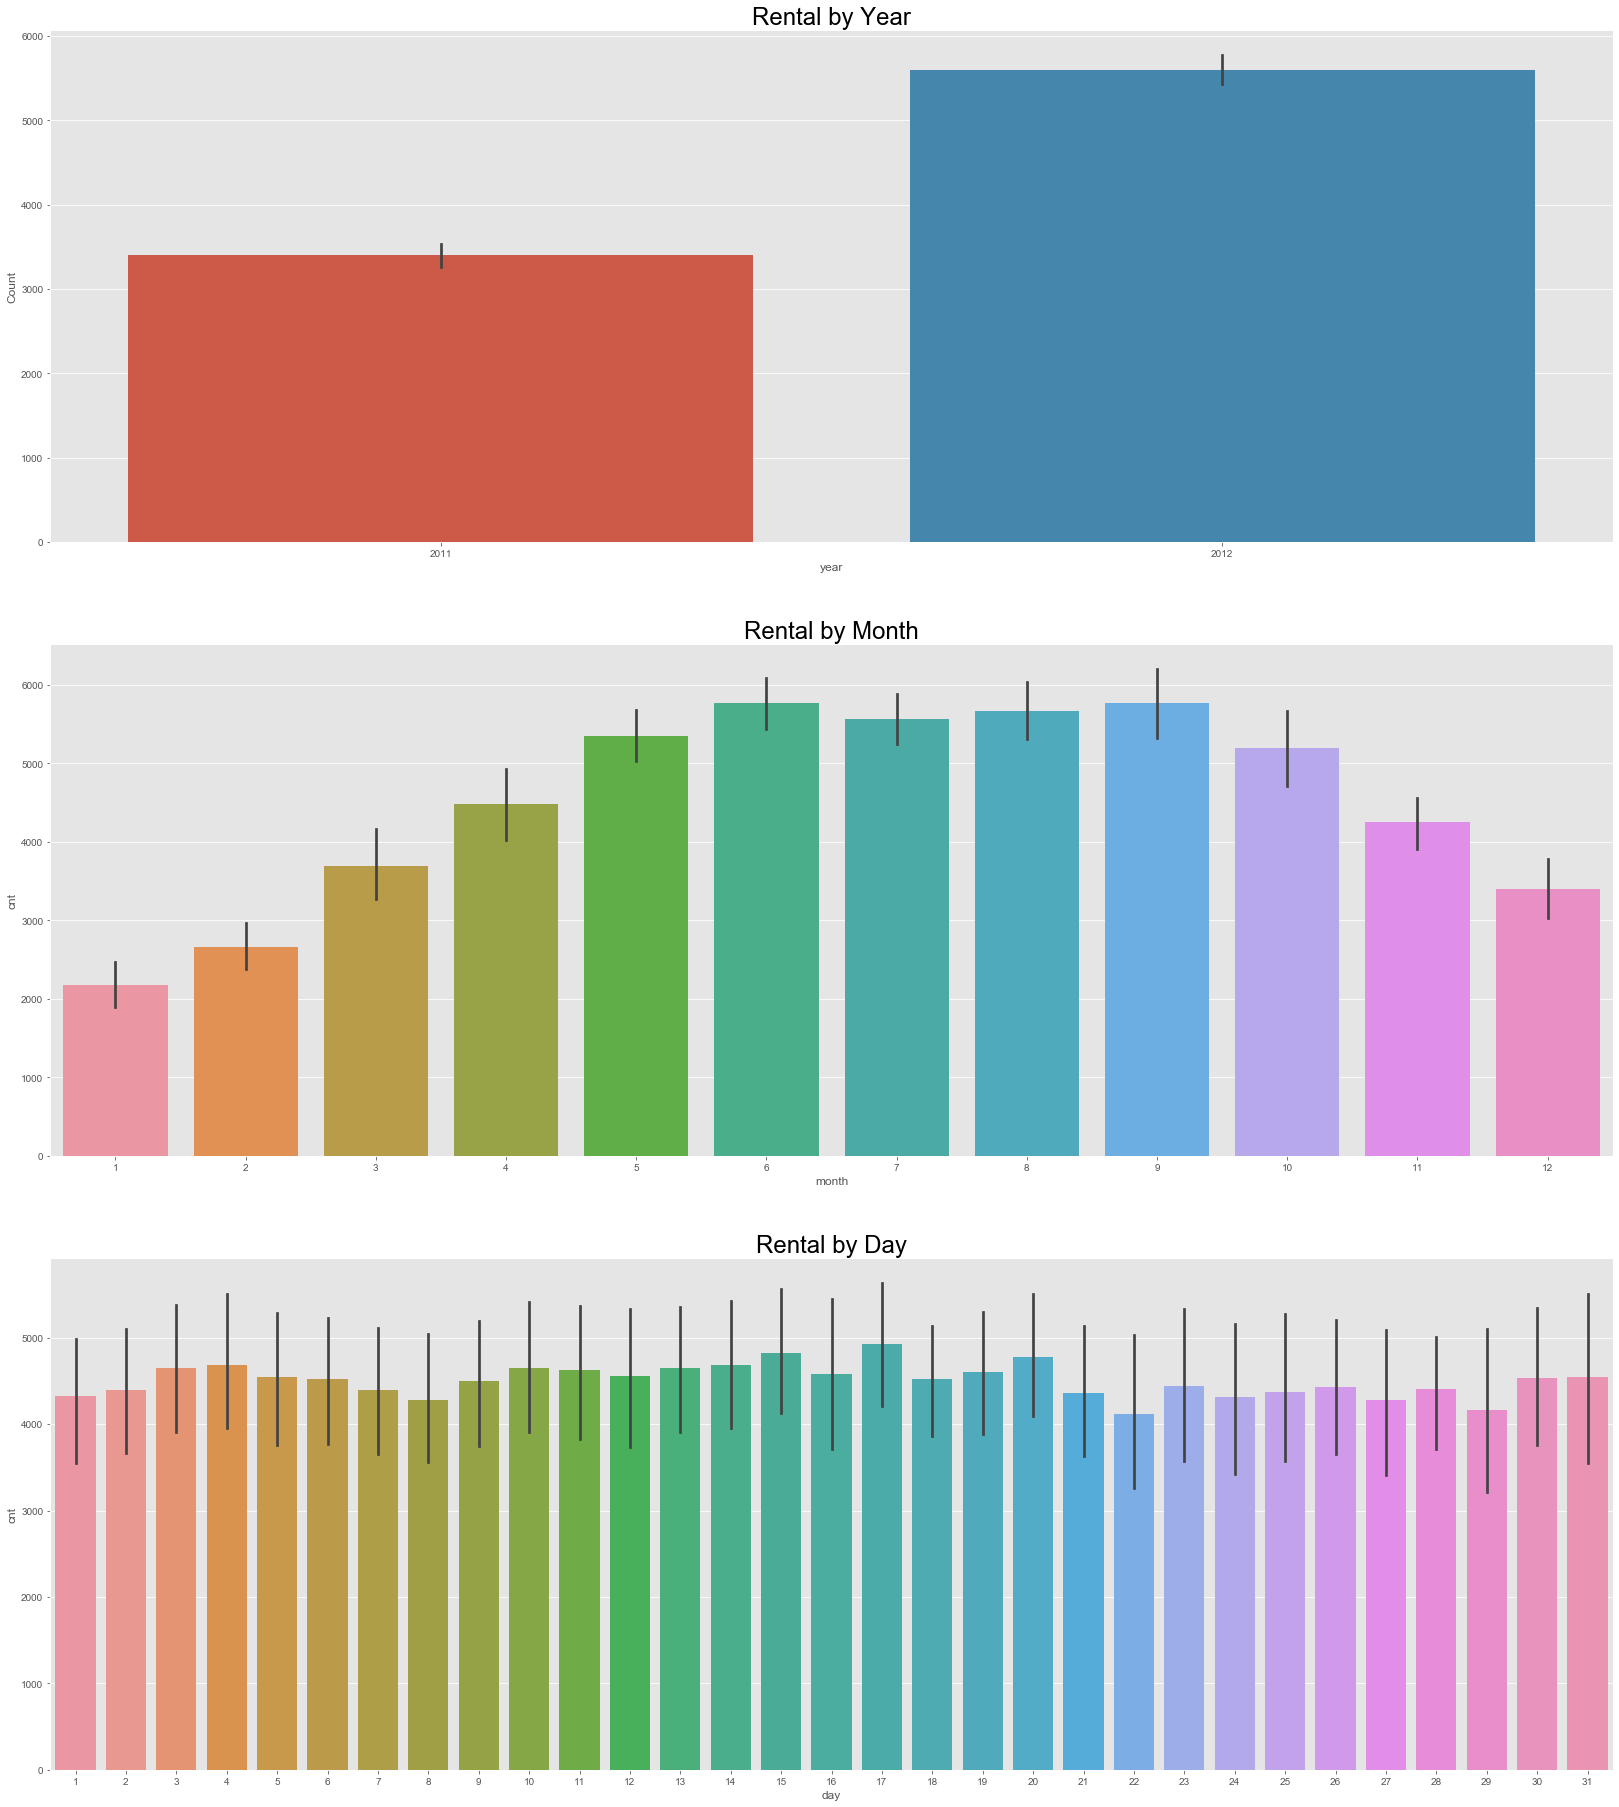

In [15]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(28,32)

sns.barplot(data=df, x="year", y="cnt", ax=ax1)
sns.barplot(data=df, x="month", y="cnt", ax=ax2)
sns.barplot(data=df, x="day", y="cnt", ax=ax3)

sns.set(font_scale = 2)

ax1.set(ylabel='Count',title="Rental by Year")
ax2.set(xlabel='month',title="Rental by Month")
ax3.set(xlabel='day', title="Rental by Day")

# ax1.xaxis.label.set_size(28)
# ax2.xaxis.label.set_size(28)
# ax3.xaxis.label.set_size(28)

# ax1.yaxis.label.set_size(28)
# ax2.yaxis.label.set_size(28)
# ax3.yaxis.label.set_size(28)


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working Day Count')]

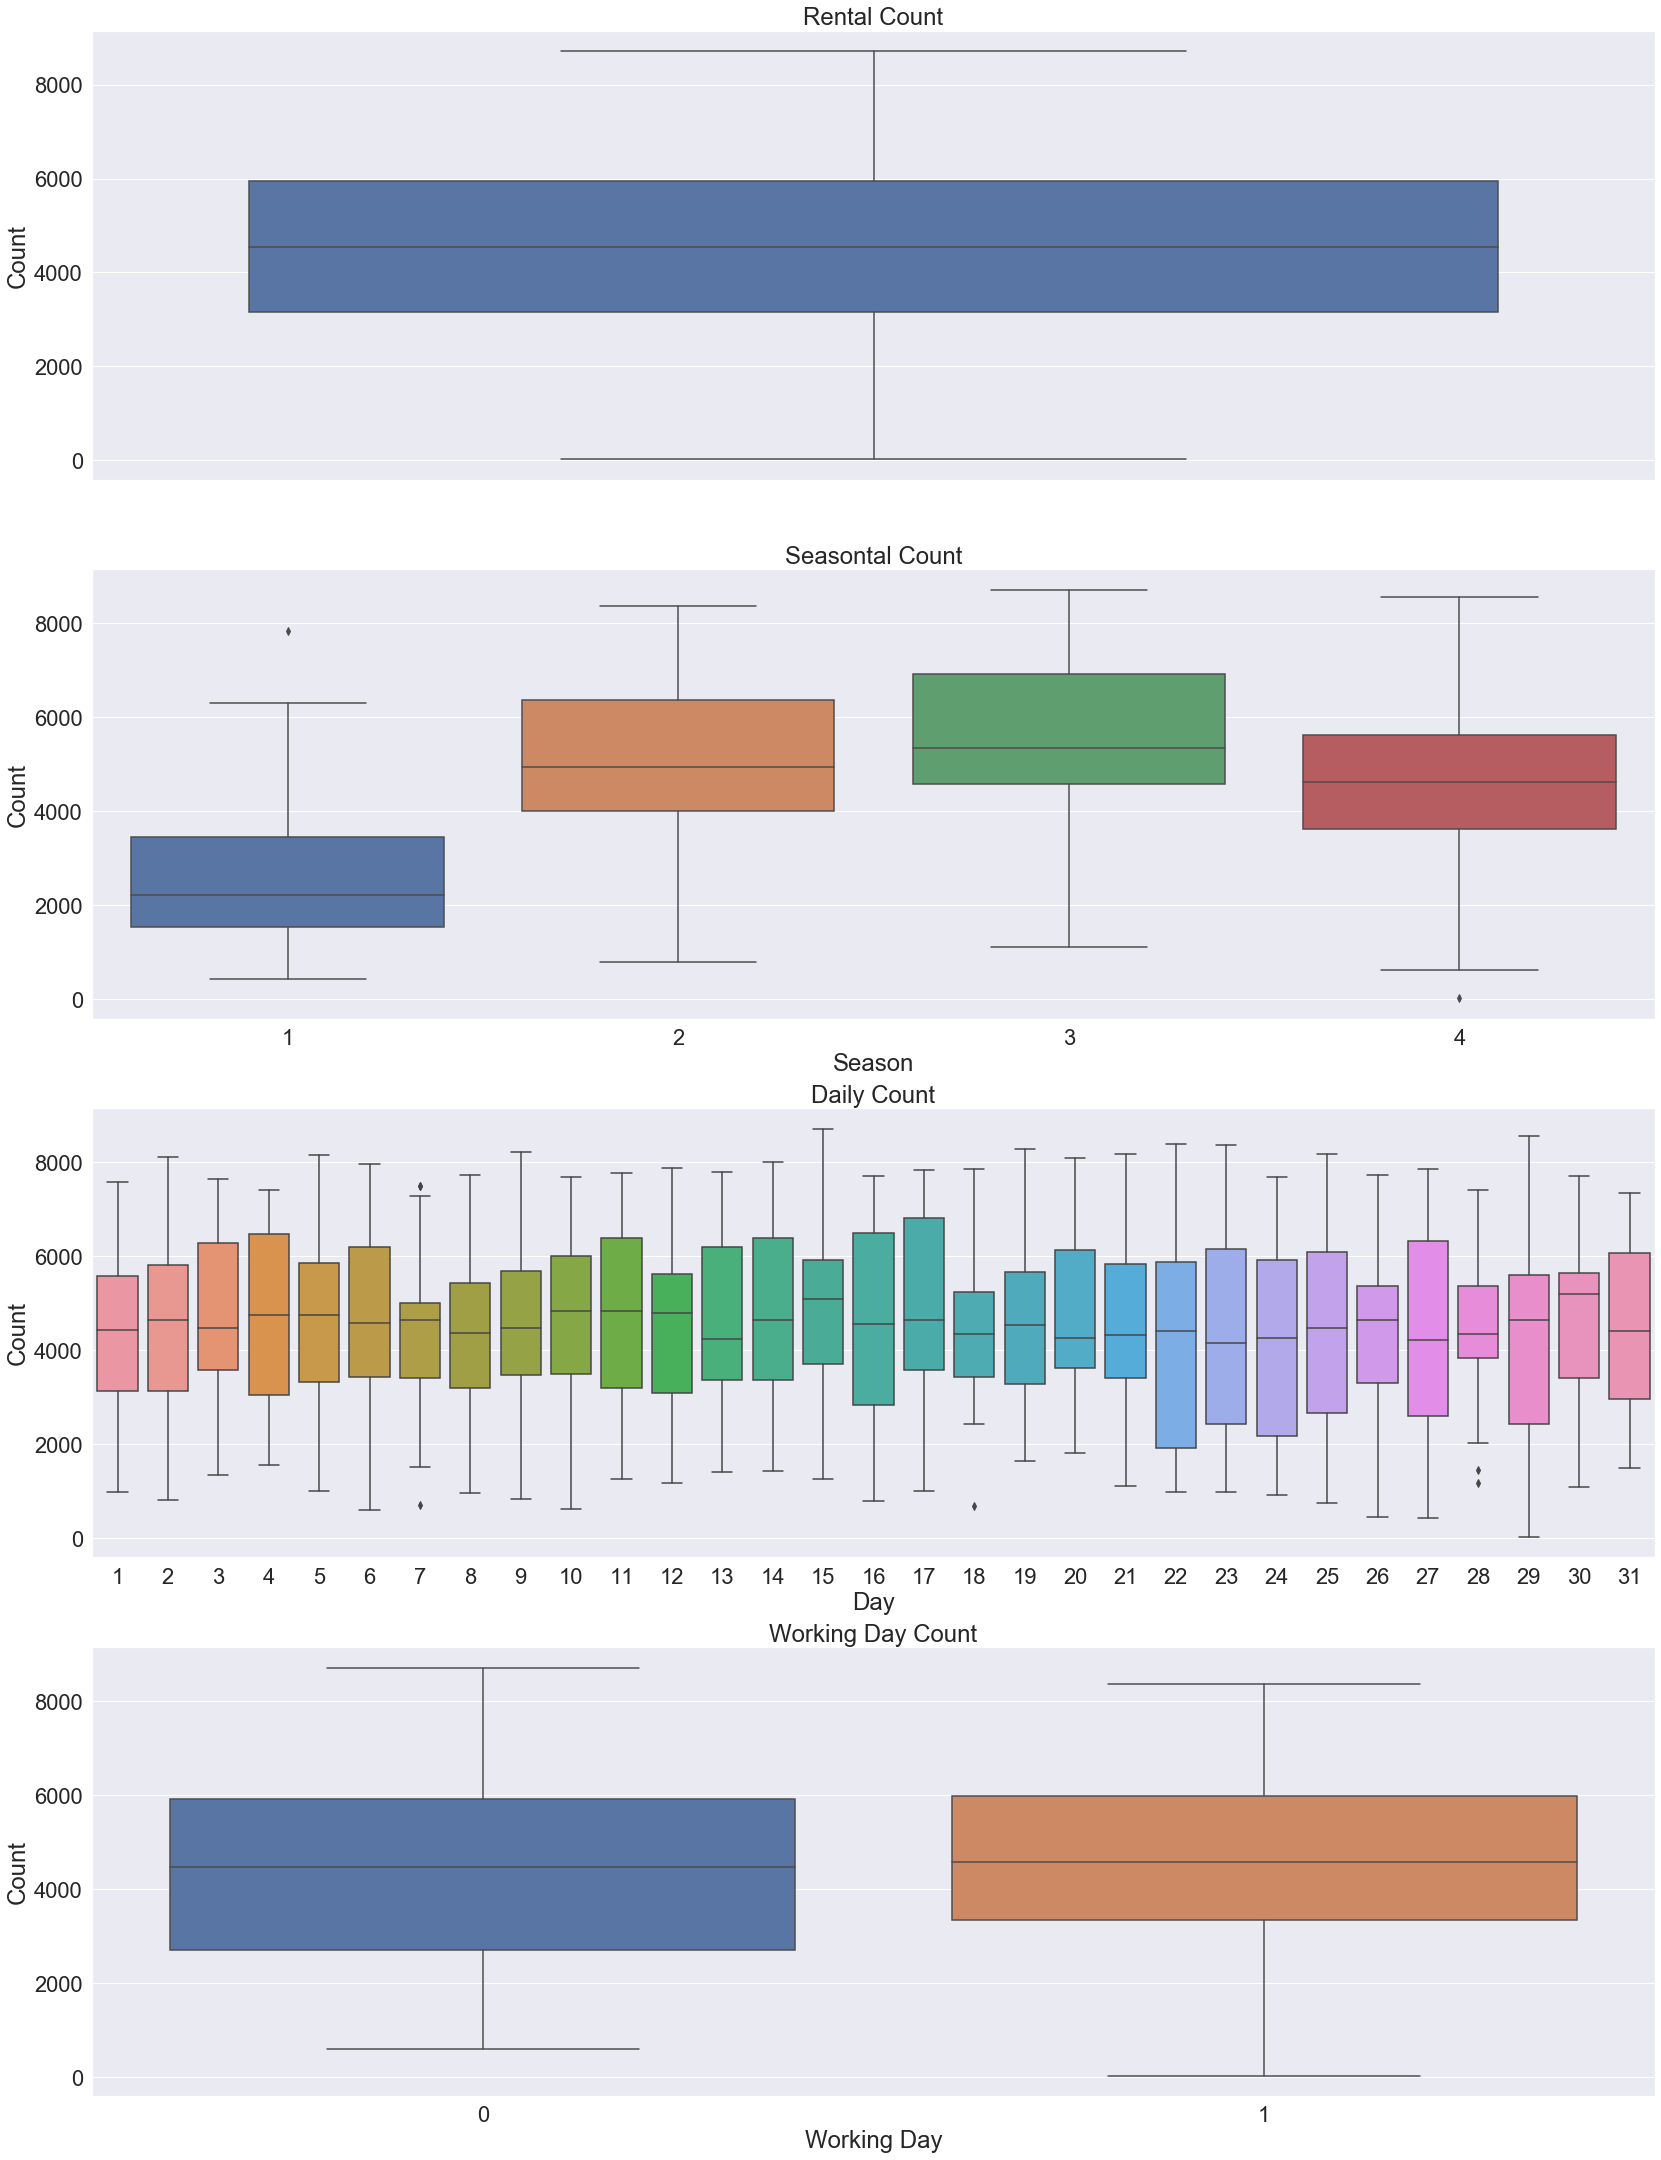

In [24]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(28, 38)

sns.boxplot(data=df,y="cnt",orient="v",ax=ax1)
sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=ax2)
sns.boxplot(data=df,y="cnt",x="day",orient="v",ax=ax3)
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=ax4)
            
sns.set(font_scale=2)

ax1.set(ylabel='Count',title="Rental Count")
ax2.set(xlabel='Season', ylabel='Count',title="Seasontal Count")
ax3.set(xlabel='Day', ylabel='Count',title="Daily Count")
ax4.set(xlabel='Working Day', ylabel='Count',title="Working Day Count")

In [16]:
df["dayofweek"] = df["dteday"].dt.dayofweek
df.shape

(731, 20)

In [17]:
df["dayofweek"].value_counts()

6    105
5    105
0    105
4    104
3    104
2    104
1    104
Name: dayofweek, dtype: int64

In [18]:
# Line Chart with Altair
lchart = alt.Chart(df).mark_line().encode(
    alt.X('weekday'),
    alt.Y('sum(cnt)'),
#     color='weekday',
   tooltip=['sum(cnt)']
)
lchart + lchart.mark_circle()
#lchart.interactive()

alt.LayerChart(...)

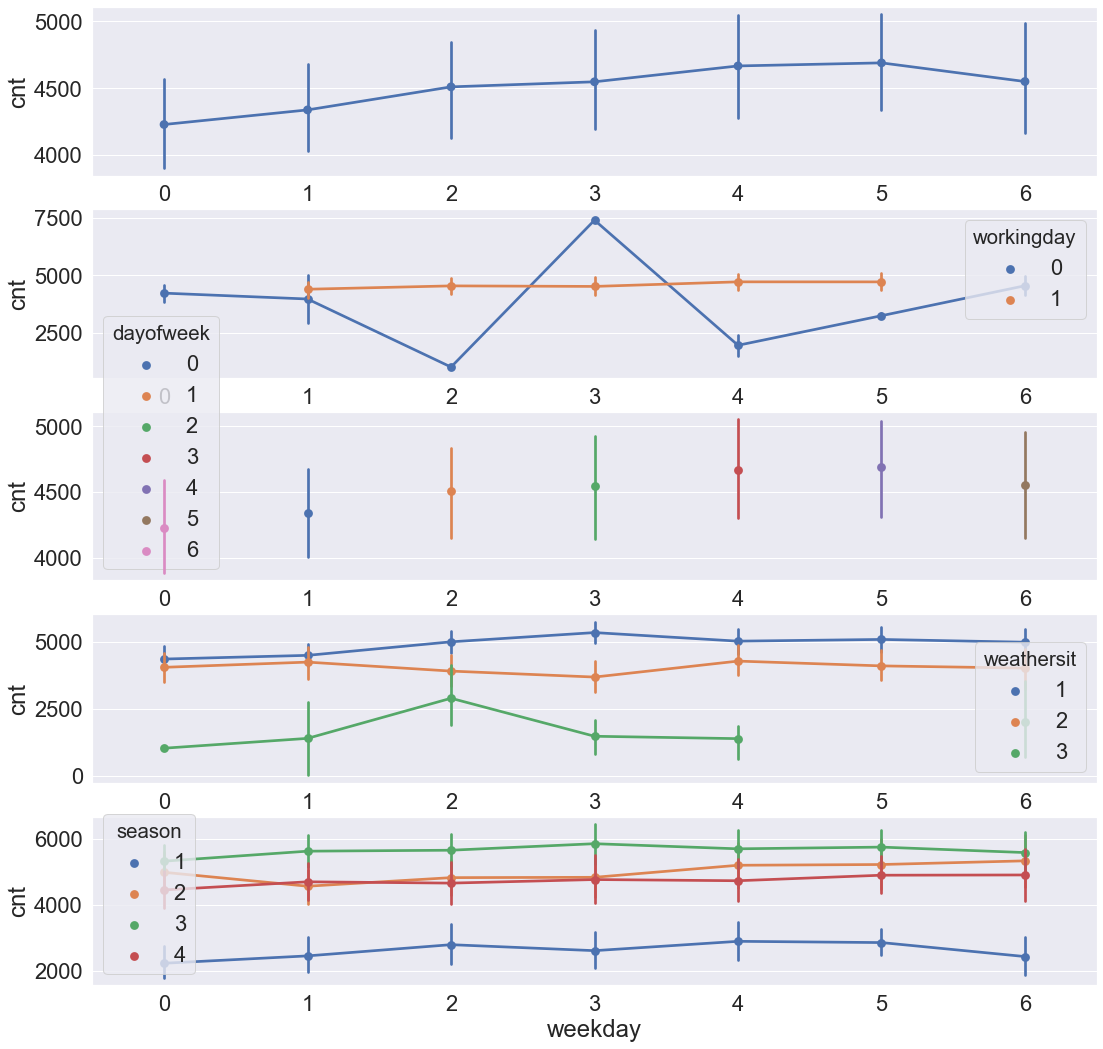

In [19]:
import numpy as np
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,18)

sns.pointplot(data=df, x="weekday", y="cnt", estimator=np.mean,ax=ax1)

sns.pointplot(data=df, x="weekday", y="cnt", estimator=np.mean, hue="workingday", ax=ax2)

sns.pointplot(data=df, x="weekday", y="cnt", estimator=np.mean, hue="dayofweek", ax=ax3)

sns.pointplot(data=df, x="weekday", y="cnt", estimator=np.mean, hue="weathersit", ax=ax4)

sns.pointplot(data=df, x="weekday", y="cnt", estimator=np.mean, hue="season", ax=ax5)

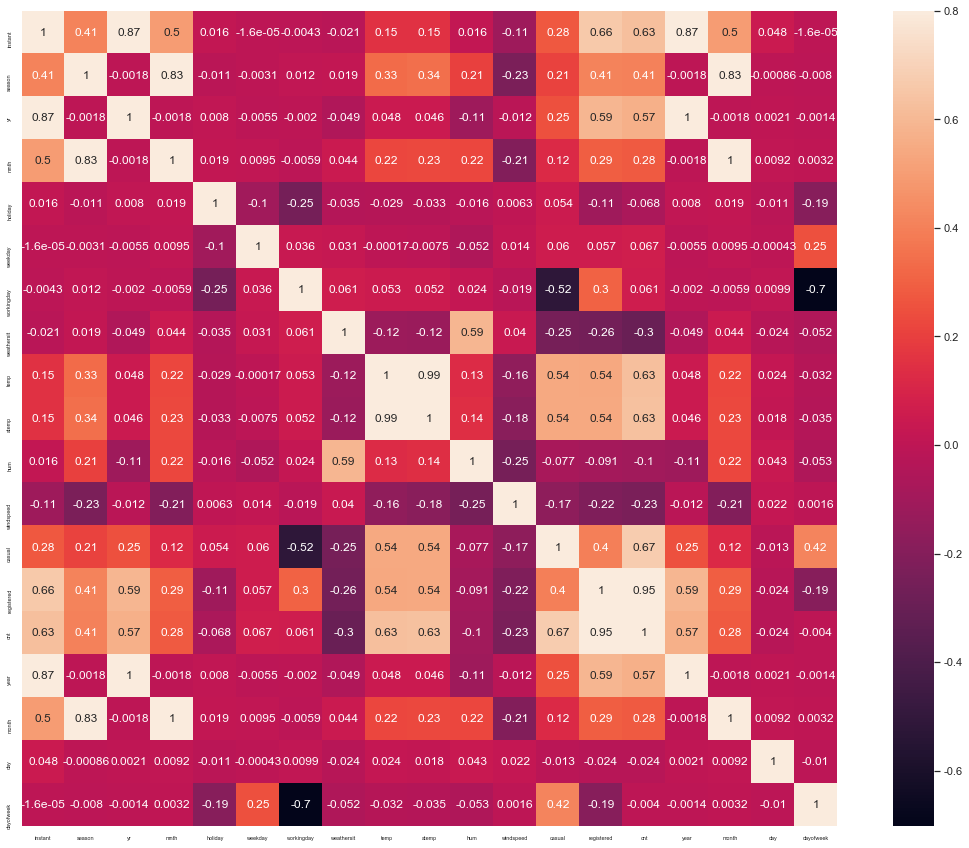

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.set(font_scale=1)
sns.heatmap(df.corr(), vmax=.8, square=True,annot=True)


In [21]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')

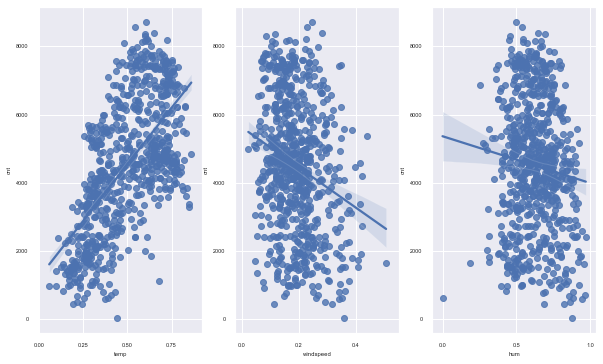

In [22]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(10, 6)
sns.regplot(x="temp", y="cnt", data=df,ax=ax1)
sns.regplot(x="windspeed", y="cnt", data=df,ax=ax2)
sns.regplot(x="hum", y="cnt", data=df,ax=ax3)
sns.set(font_scale=1)

In [23]:
import datetime as datetime
def calculate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

df["year_month"] = df["dteday"].apply(calculate_year_month)

print(df.shape)
df[["dteday", "year_month"]].head()

(731, 21)


dteday year_month
0 2011-01-01     2011-1
1 2011-01-02     2011-1
2 2011-01-03     2011-1
3 2011-01-04     2011-1
4 2011-01-05     2011-1

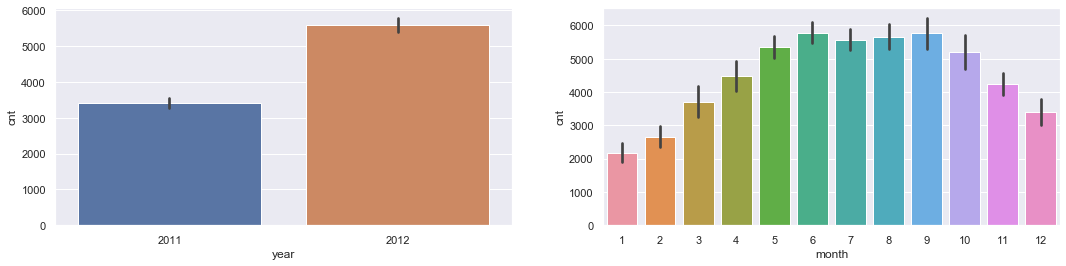

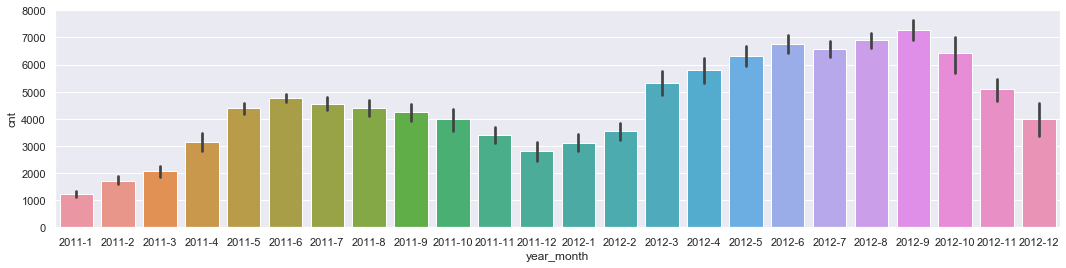

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=df, x="year", y="cnt", ax=ax1)
sns.barplot(data=df, x="month", y="cnt", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=df, x="year_month", y="cnt", ax=ax3)

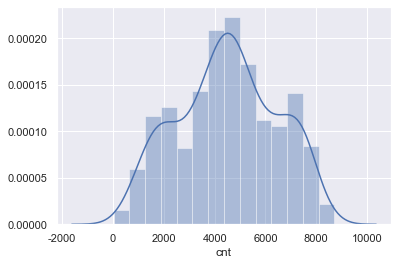

In [28]:
sns.distplot(df.cnt)